In [3]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('/home/hcleroy/PostDoc/Simulation/Aging_Condensates/Gillespie_backend/')
import Gillespie_backend as backend
from multiprocessing import Pool

In [7]:
ell_tot = 100
#distance_anchor = 1000.
rho0 = 5.*10**-4
tmax = 10000

In [12]:
S = backend.Gillespie(ell_tot,rho0,-10,seed=np.random.randint(100000))
Nloop = np.zeros(tmax,dtype=float)
for t in range(tmax):
    if t%1000==0:
        print(t)
        S.reset_crosslinkers()
    S.evolve()
    Nloop[t] = S.get_N_loop()/ell_tot
print()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000



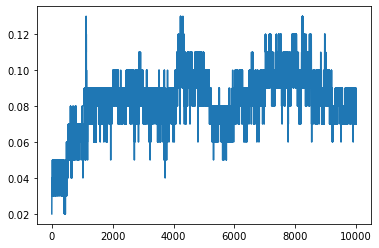

In [13]:
plt.plot(np.arange(0,tmax,1.),Nloop)

In [ ]:
Emin,Emax = -6.,-2
Npoints = 10
ell_tot = 600
#distance_anchor = 1000.
rho0 = 5.*10**-4
teq = 30000
t_compute = 200000


def get_N(BindingEnergy):
    S = backend.Gillespie(ell_tot,rho0,BindingEnergy,seed=np.random.randint(100000))
    for t in range(teq):
        if t%(t_compute//10)==0 and t!=0:
            S.reset_crosslinkers()
        S.evolve()
        Nav = 0
    ttot = 0
    print('process : '+"{:.2f}".format(BindingEnergy)+' equilibration over')
    for t in range(t_compute):
        if t%(t_compute//10)==0:
            print('process : '+"{:.2f}".format(BindingEnergy)+' time : '+str(t))
            S.reset_crosslinkers()
        Nloop = S.get_N_loop()
        bind,dt = S.evolve()
        Nav += Nloop*dt
        ttot+=dt
    return Nav/ttot